In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

%matplotlib inline

from sklearn.cluster import KMeans

***Importing Datasets***

In [3]:
df =pd.read_csv("C:\\Users\\Avila\\OneDrive\\Desktop\\csv files\\Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


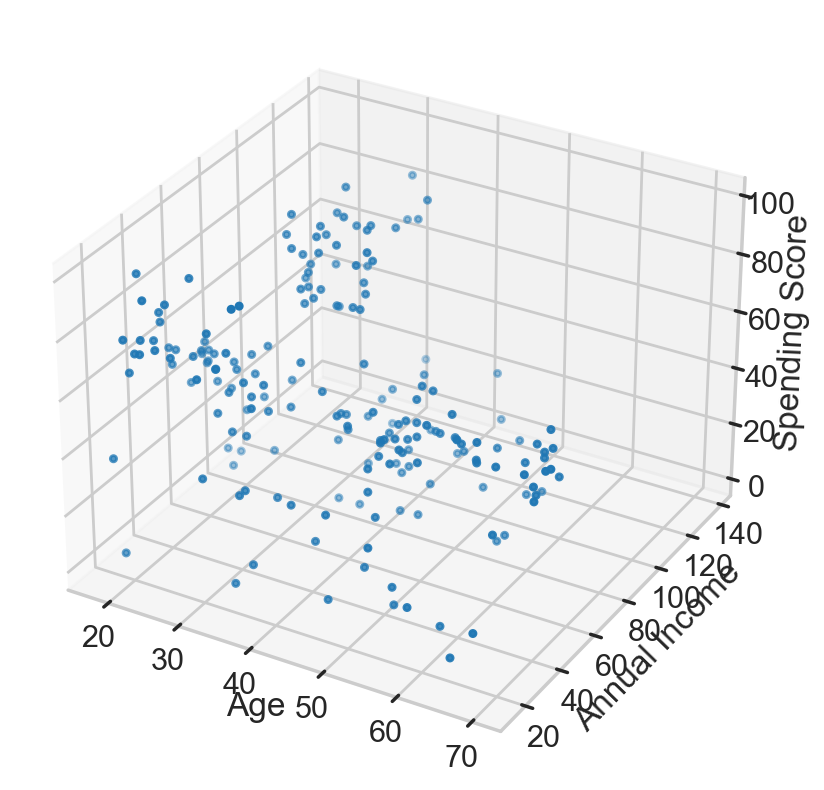

In [38]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection = '3d')

x = df['Age']
y = df['Annual Income (k$)']
z = df['Spending Score (1-100)']

ax.set_xlabel("Age")
ax.set_ylabel("Annual Income")
ax.set_zlabel("Spending Score")

ax.scatter(x, y, z)

plt.show()

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

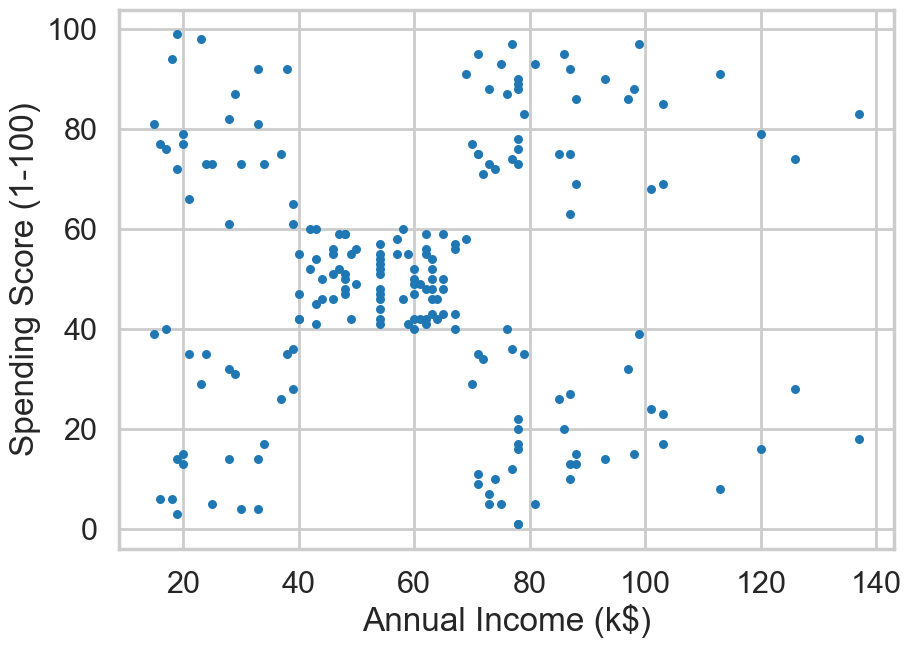

In [5]:
df.plot(x='Annual Income (k$)', y='Spending Score (1-100)',kind='scatter', figsize=(10,7))

In [6]:
df.groupby('Gender')['Age','Annual Income (k$)','Spending Score (1-100)'].mean()

C:\Users\Avila\AppData\Local\Temp\ipykernel_12456\1600430559.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Gender')['Age','Annual Income (k$)','Spending Score (1-100)'].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


<ul>
    <li>The <span style="color:green;">average</span> annual income of male is 62% greater than <span style="color:red;">3%</span> to female which is 59%</li>
</ul>


In [7]:
df.Gender = df.Gender.map({'Female':1,'Male':2})

<ul>
<li>Converting <span style="color:blue;">Categorical Values</span> to <span style="color:gold;">Numerical Values</span></li>
</ul>

In [8]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,2,19,15,39
1,2,2,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
...,...,...,...,...,...
195,196,1,35,120,79
196,197,1,45,126,28
197,198,2,32,126,74
198,199,2,32,137,18


In [9]:
kmeans = KMeans(n_clusters=5, max_iter=1000, random_state=1)


kmeans.fit(df)

KMeans(max_iter=1000, n_clusters=5, random_state=1)

In [10]:
kmeans.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 4, 4, 4, 4, 3, 3, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [40]:
k5_segments = kmeans.labels_


df_k5 = df.copy()
df_k5['Segments'] = k5_segments
df_k5.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Segments
0,1,2,19,15,39,4
1,2,2,21,15,81,5
2,3,1,20,16,6,4
3,4,1,23,16,77,5
4,5,1,31,17,40,4


In [12]:
df_k5.Label.value_counts()

1    68
2    39
0    38
4    30
3    25
Name: Label, dtype: int64

In [13]:
df_k5[(df_k5.Label == 1)].describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Label
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.0
mean,89.470588,1.441176,43.911765,56.588235,50.044118,1.0
std,19.825711,0.500219,17.238221,7.109454,5.910865,0.0
min,54.000000,1.000000,18.000000,43.000000,40.000000,1.0
25%,72.750000,1.000000,26.750000,49.750000,46.000000,1.0
50%,89.500000,1.000000,47.500000,58.000000,50.000000,1.0
75%,106.250000,2.000000,59.000000,62.250000,55.000000,1.0
max,123.000000,2.000000,70.000000,69.000000,60.000000,1.0


In [14]:
#Check the statistics on each cluster, this will help us "Profile" the clusters (Use a Pivot Table)
pd.pivot_table(df_k5, index = ['Label'], values = ['Annual Income (k$)','Spending Score (1-100)'], 
               aggfunc=[np.mean,np.min, np.max])

mean                                      amin  \
      Annual Income (k$) Spending Score (1-100) Annual Income (k$)   
Label                                                                
0              87.000000              18.631579                 70   
1              56.588235              50.044118                 43   
2              86.538462              82.128205                 69   
3              27.600000              76.840000                 15   
4              29.766667              26.833333                 15   

                                           amax                         
      Spending Score (1-100) Annual Income (k$) Spending Score (1-100)  
Label                                                                   
0                          1                137                     40  
1                         40                 69                     60  
2                         63                137                     97  
3                         54                 43                     99  
4                          3                 43                     55

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

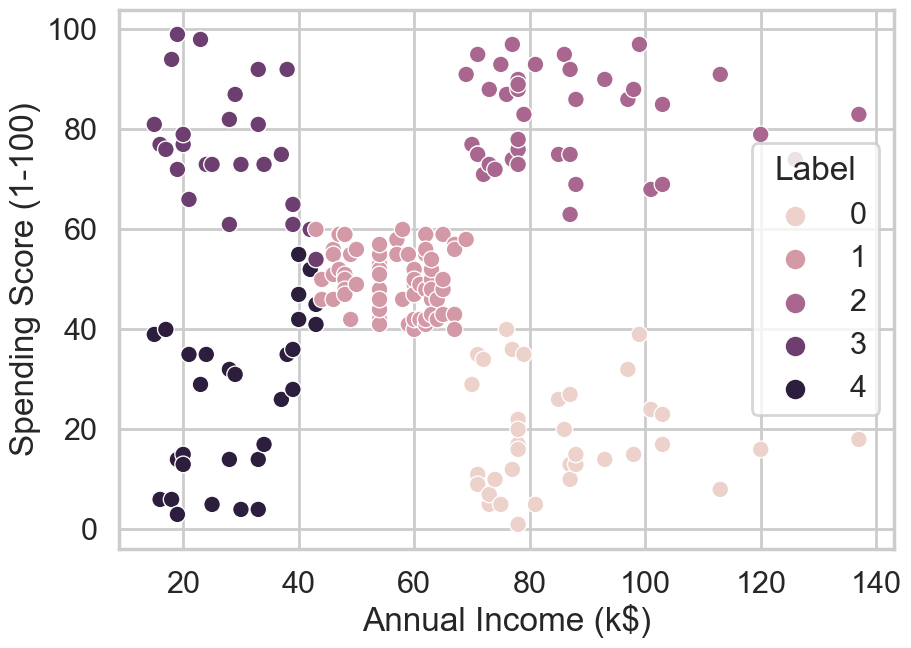

In [19]:
fig, ax = plt.subplots(figsize=(10,7))

sns.scatterplot(ax = ax, x=df_k5['Annual Income (k$)'], y=df_k5['Spending Score (1-100)'], hue=df_k5.Label)

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

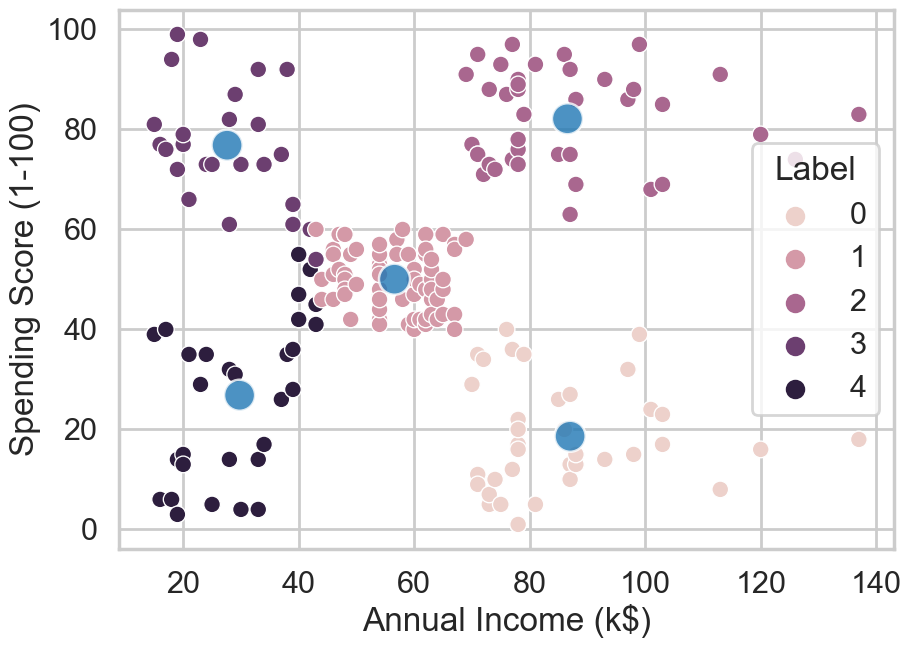

In [26]:
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(ax = ax, x=df_k5['Annual Income (k$)'], y=df_k5['Spending Score (1-100)'], hue=df_k5.Label)

centers = kmeans.cluster_centers_
sns.scatterplot(x=centers[:,3], y=centers[:,4], s=500, alpha=0.8, marker='o', hue=[0,0,0,0,0], legend=False)

In [27]:
range_n_clusters= [2,3,4,5,6,7,8,9,10]

scores = []

for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i, random_state=1) 
     
    kmeans.fit(df)
        
    score = kmeans.inertia_
       
    scores.append(score)
    
    print(str(i) +"\t" +str(score))

2	387065.7137713771
3	271396.5629660315
4	195393.50384615385
5	157505.72072477572
6	122637.55796110154
7	103208.9432178932
8	86026.5343045843
9	77067.20364393896
10	69707.65712224334


Text(0, 0.5, 'Score')

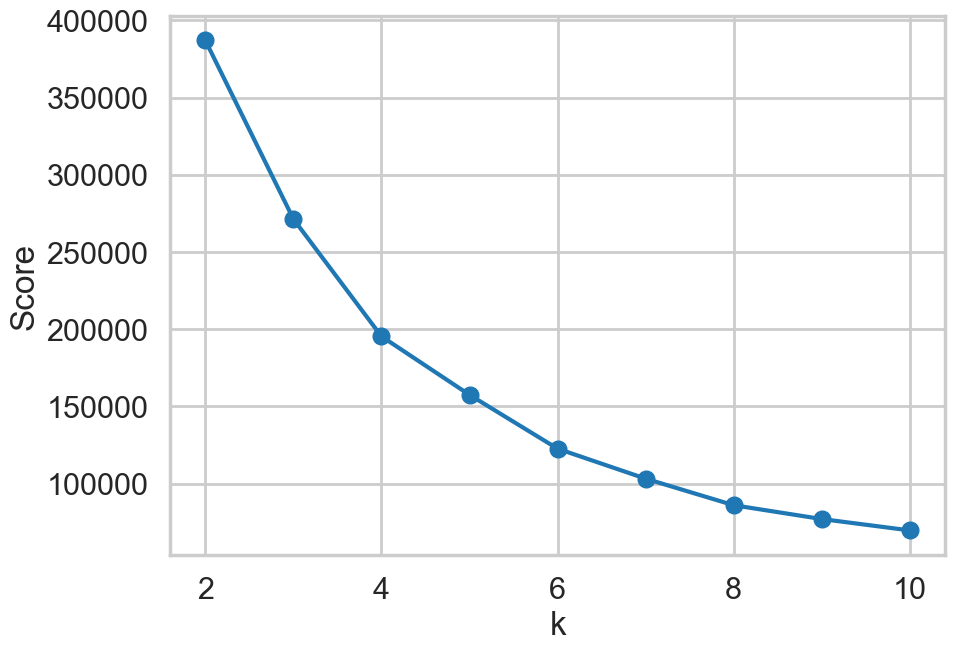

In [28]:
plt.figure(figsize=(10,7))
plt.plot(range_n_clusters, np.abs(scores), marker='o')
plt.xlabel("k")
plt.ylabel("Score")

In [29]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

In [30]:
kmeans = KMeans(n_clusters=6, random_state=1) 
kmeans.fit(df)

sil_score_k5 = silhouette_score(df, kmeans.labels_)

print("Silhouette Score for k=5: %.2f" % sil_score_k5)

Silhouette Score for k=5: 0.41


In [31]:
range_n_clusters= [2,3,4,5,6,7,8,9,10]

for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i, random_state=1)
    
      kmeans.fit(df)
    
     sil_score = silhouette_score(df,kmeans.labels_)
       
    print("%s \t %.2f" % (i, sil_score))

2 	 0.48
3 	 0.38
4 	 0.42
5 	 0.43
6 	 0.41
7 	 0.41
8 	 0.40
9 	 0.39
10 	 0.39
